In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
rcParams['figure.dpi'] = 300

In [2]:
sk = !ls *test3.x*

In [3]:
keras = !ls *keras*

In [4]:
keras

['SEA_keras.xlsx',
 'covertype_keras.xlsx',
 'elec_keras.xlsx',
 'gassensor_keras.xlsx',
 'hyperplane_keras.xlsx',
 'poker_keras.xlsx',
 'rbf_keras.xlsx',
 'sine_keras.xlsx']

 ('SEA_test3.xlsx', 'SEA_keras.xlsx')


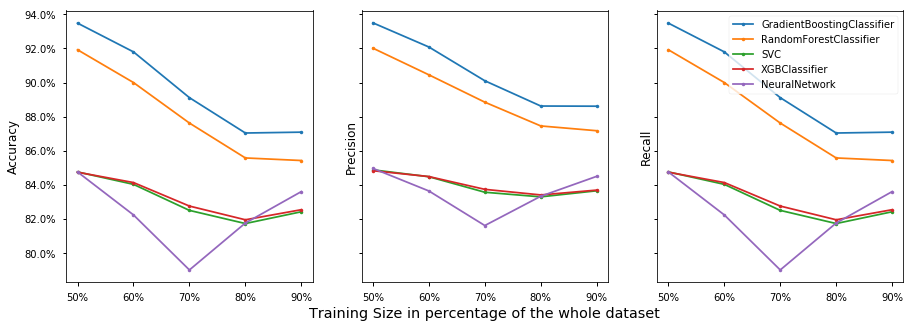

 ('covertype_test3.xlsx', 'covertype_keras.xlsx')


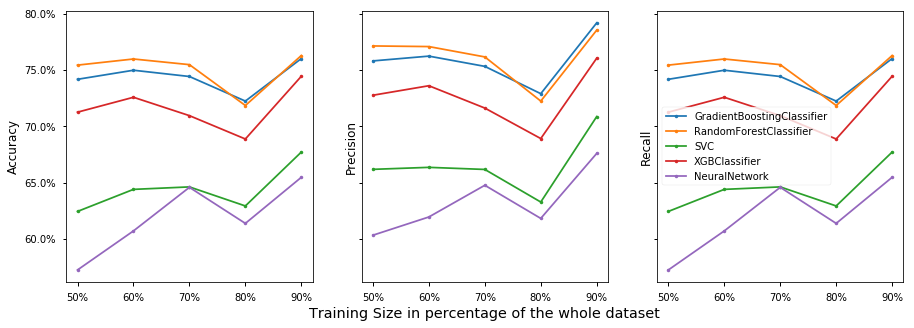

 ('elec_test3.xlsx', 'elec_keras.xlsx')


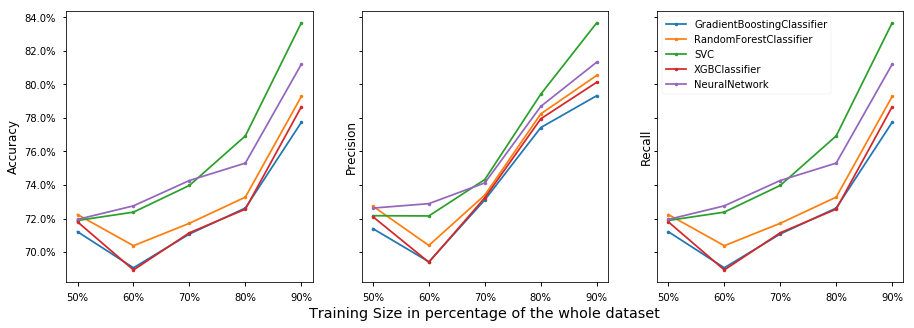

 ('gassensor_test3.xlsx', 'gassensor_keras.xlsx')


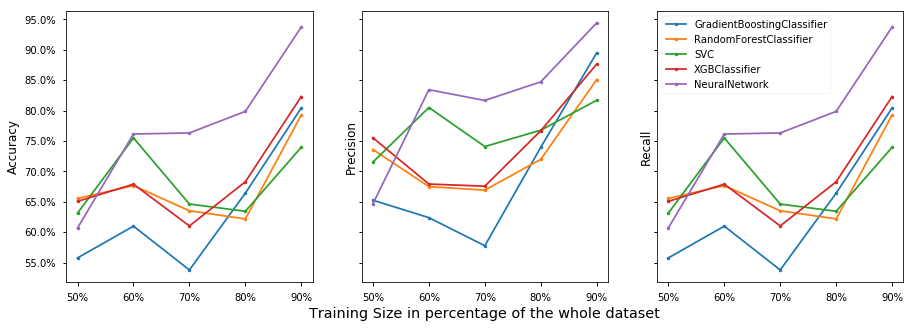

 ('hyperplane_test3.xlsx', 'hyperplane_keras.xlsx')


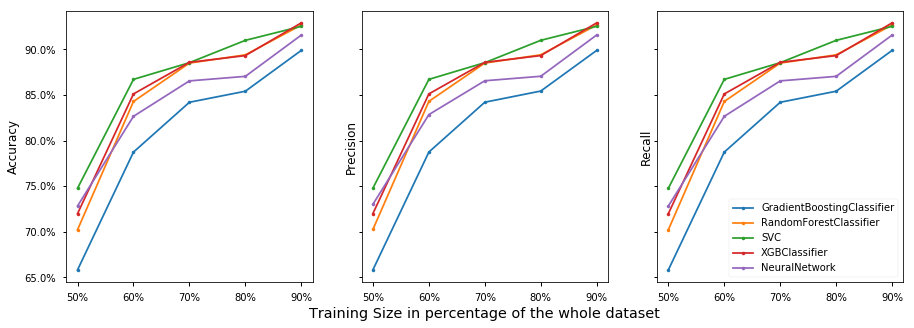

 ('poker_test3.xlsx', 'poker_keras.xlsx')


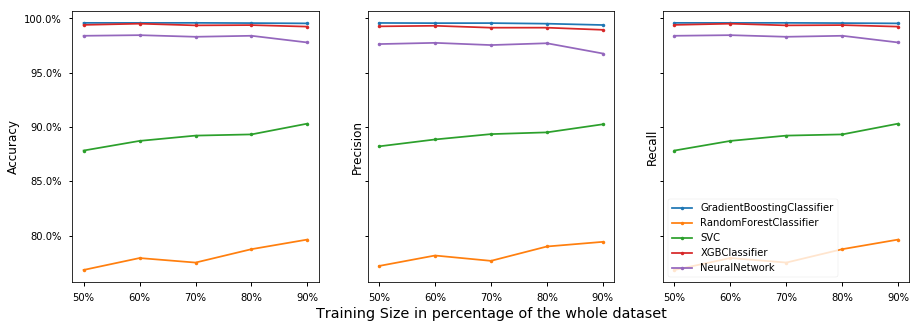

 ('rbf_test3.xlsx', 'rbf_keras.xlsx')


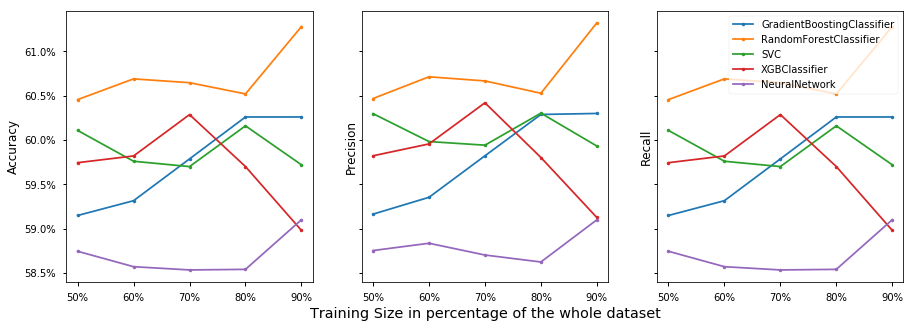

 ('sine_test3.xlsx', 'sine_keras.xlsx')


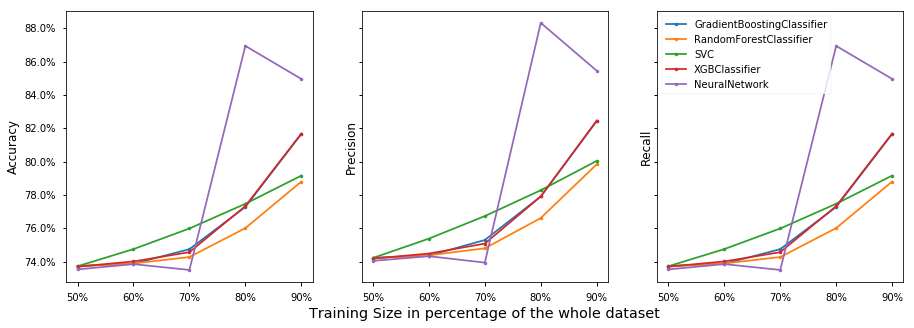

In [6]:
for file in list(zip(sk,keras)):
    
    df = pd.concat([pd.read_excel(file[0], index_col=[0,1]), pd.read_excel(file[1], index_col=[0,1])])
    df = df.rename(index={'keras': 'NeuralNetwork'})
    print('='*100,'\n',file)

    clfs = ['GradientBoostingClassifier', 'RandomForestClassifier', 'SVC', 'XGBClassifier', 'NeuralNetwork']

    fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

    for clf in clfs:
        axes[0].plot(df.loc[clf].acc, label=clf, marker='.')
        axes[1].plot(df.loc[clf].precision, label=clf, marker='.')
        axes[2].plot(df.loc[clf].recall, label=clf, marker='.')
    plt.legend()
    axes[0].set_ylabel('Accuracy',  fontsize='large')
    axes[1].set_ylabel('Precision',  fontsize='large')
    axes[2].set_ylabel('Recall',  fontsize='large')
    axes[1].set_xlabel('Training Size in percentage of the whole dataset', fontsize='x-large')
    axes[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
    axes[0].xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
    plt.savefig('results/'+re.findall(r'^(.*)\_', file[0])[0]+'.png', dpi=300)
    plt.show()
    #display(df)
    df.to_excel('results/'+re.findall(r'^(.*)\_', file[0])[0]+'.xlsx')